# Part 1
by: Rafael Carlo Posadas

In [1899]:
import numpy as np
import pandas as pd

In [1900]:
df0 = pd.read_csv('KSI_dataset.csv')

## Data exploration

In [1901]:
print(f"Shape: {df0.shape}")

Shape: (18957, 54)


In [1902]:
# Show all columns
print(f"Columns: \n{df0.columns.tolist()}")

Columns: 
['OBJECTID', 'INDEX', 'ACCNUM', 'DATE', 'TIME', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'LATITUDE', 'LONGITUDE', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'x', 'y']


In [1903]:
# Data types of each column.
print("Data types:\n")
df0.info()

Data types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           18957 non-null  int64  
 1   INDEX              18957 non-null  int64  
 2   ACCNUM             14027 non-null  float64
 3   DATE               18957 non-null  object 
 4   TIME               18957 non-null  int64  
 5   STREET1            18957 non-null  object 
 6   STREET2            17251 non-null  object 
 7   OFFSET             3820 non-null   object 
 8   ROAD_CLASS         18471 non-null  object 
 9   DISTRICT           18728 non-null  object 
 10  LATITUDE           18957 non-null  float64
 11  LONGITUDE          18957 non-null  float64
 12  ACCLOC             13501 non-null  object 
 13  TRAFFCTL           18882 non-null  object 
 14  VISIBILITY         18933 non-null  object 
 15  LIGHT              18953 non-null  object 
 16  RDSFCOND 

## Data pre-processing

In [1904]:
# Identify only columns with missing values.
df0_null_count = df0.isnull().sum()
df0_null_count[df0_null_count > 0]

ACCNUM            4930
STREET2           1706
OFFSET           15137
ROAD_CLASS         486
DISTRICT           229
ACCLOC            5456
TRAFFCTL            75
VISIBILITY          24
LIGHT                4
RDSFCOND            29
ACCLASS              1
IMPACTYPE           27
INVTYPE             16
INJURY            8897
FATAL_NO         18087
INITDIR           5277
VEHTYPE           3487
MANOEUVER         7953
DRIVACT           9289
DRIVCOND          9291
PEDTYPE          15728
PEDACT           15730
PEDCOND          15711
CYCLISTYPE       18152
CYCACT           18155
CYCCOND          18157
PEDESTRIAN       11269
CYCLIST          16971
AUTOMOBILE        1727
MOTORCYCLE       17273
TRUCK            17788
TRSN_CITY_VEH    17809
EMERG_VEH        18908
PASSENGER        11774
SPEEDING         16263
AG_DRIV           9121
REDLIGHT         17380
ALCOHOL          18149
DISABILITY       18464
dtype: int64

#### Duplicate original dataset and impute binary columns with 'No'.

In [1905]:
df1 = df0.copy()
for col in df1.columns:
    if df1[col].isin(["Yes", None]).any():
        df1[col] = df1[col].fillna("No")

In [1906]:
# Probably not significant to examine, so this cell is not included in the .py file.

# Calculate the difference in null counts for 'Yes'/'No' columns.
df1_null_count = df1.isnull().sum()
null_count_difference = df0_null_count - df1_null_count

# Identify and print columns where missing values were replaced with "No".
columns_with_changes = null_count_difference[null_count_difference > 0].index
print(f"Columns with missing values replaced by 'No':\n{columns_with_changes.tolist()}")

Columns with missing values replaced by 'No':
['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']


#### Breakdown DATE column into smaller components

In [1907]:
# Convert the DATE column to datetime. This will be dropped later.
df1['DATE'] = pd.to_datetime(df1['DATE'])
# Extract day, month, and year into their own columns.
df1['DAY_OF_WEEK'] = df1['DATE'].dt.day_name()
df1['DAY'] = df1['DATE'].dt.day
df1['MONTH'] = df1['DATE'].dt.month
df1['YEAR'] = df1['DATE'].dt.year
# Extract the hour component. This is not instructed, just personal preference for plot usage.
df1['HOUR'] = (df1['TIME'] // 100).astype(int)

#### Remove insignificant columns (>80% missing values)

In [1908]:
# Identify columns with over 80% missing values.
missing_percentage = df1.isnull().sum() / len(df1) * 100
print(f"Missing values percentages: \n{missing_percentage[missing_percentage > 0]}\n")
# Columns within .5% will be considered
columns_to_drop = missing_percentage[missing_percentage >= 80].index.tolist()
print(f"Columns with >80% missing values:\n{columns_to_drop}")

Missing values percentages: 
ACCNUM        26.006225
STREET2        8.999314
OFFSET        79.849132
ROAD_CLASS     2.563697
DISTRICT       1.207997
ACCLOC        28.780925
TRAFFCTL       0.395632
VISIBILITY     0.126602
LIGHT          0.021100
RDSFCOND       0.152978
ACCLASS        0.005275
IMPACTYPE      0.142428
INVTYPE        0.084402
INJURY        46.932532
FATAL_NO      95.410666
INITDIR       27.836683
VEHTYPE       18.394261
MANOEUVER     41.952841
DRIVACT       49.000369
DRIVCOND      49.010919
PEDTYPE       82.966714
PEDACT        82.977264
PEDCOND       82.877038
CYCLISTYPE    95.753548
CYCACT        95.769373
CYCCOND       95.779923
dtype: float64

Columns with >80% missing values:
['FATAL_NO', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND']


In [1909]:
# - Drop columns with over 80% missing values.
# - The added columns are instructed as redundant and to be dropped.
# - 'WARDNUM' and 'POLICE_DIVISION' were not found in the table, so they're excluded.
# - 'OFFSET' has 79.8% is missing; close enough to 80% so it's also being dropped.
columns_to_drop.extend([
    'DATE',
    'OBJECTID',
    'INDEX',
    'NEIGHBOURHOOD_158',
    'NEIGHBOURHOOD_140',
    'x',
    'y',
    'INITDIR',
    'STREET1',
    'STREET2',
    'DIVISION',
    # Manual addition:
    'OFFSET'
    ])
df1 = df1.drop(columns=columns_to_drop)

In [1910]:
# Verify the shape of the updated dataset.
print(f"Shape after dropping columns: {df1.shape}")

Shape after dropping columns: (18957, 40)


#### 'ACCLASS' will be the target column as this classifies the accident type - according to the PSDP_Open_Data_Documentation - and also due to its values being only 'Fatal' or 'Non-Fatal'.

In [1911]:
# Identify all values in ACCLASS column for correction.
print("'ACCLASS' before correction:")
print(f"unique: {df1['ACCLASS'].unique().tolist()}")
print(f"nulls : {df1['ACCLASS'].isnull().sum()}")

'ACCLASS' before correction:
unique: ['Non-Fatal Injury', 'Fatal', 'Property Damage O', nan]
nulls : 1


#### Only 'Property Damage' was instructed to be corrected, but any other value that's not 'Fatal' will be converted to 'Non-Fatal'.

In [1912]:
# Change incorrect values to "Non-Fatal".
# df1['ACCLASS'] = df1['ACCLASS'].replace(['Non-Fatal Injury', 'Property Damage O', None], 'Non-Fatal')
df1['ACCLASS'] = df1['ACCLASS'].apply(lambda x: 'Non-Fatal' if x != 'Fatal' else x)

In [1913]:
# Verify updated ACCLASS values.
print("'ACCLASS' after correction:")
print(f"unique: {df1['ACCLASS'].unique().tolist()}")
print(f"nulls : {df1['ACCLASS'].isnull().sum()}")

'ACCLASS' after correction:
unique: ['Non-Fatal', 'Fatal']
nulls : 0


#### Remove insignificant rows

In [1914]:
# Identify columns with missing values greater than 0% but less than 3%.
missing_percentage = df1.isnull().sum() / len(df1) * 100
columns_to_keep = missing_percentage[(missing_percentage > 0) & (missing_percentage < 3)].index
print(f"Columns with missing values >0% and <3%:\n{columns_to_keep.tolist()}\n")

# Drop rows with missing values in those columns.
df1 = df1.dropna(subset=columns_to_keep)

# Verify the shape of the updated dataset after dropping rows.
print(f"Shape after dropping rows: {df1.shape}")

Columns with missing values >0% and <3%:
['ROAD_CLASS', 'DISTRICT', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE']

Shape after dropping rows: (18242, 40)


#### Fix ACCNUM column
- Remove rows with duplicate ACCNUM values from df1.
- Hash the entire dataset, find matching hashes, and remove duplicate rows from df1.

In [1915]:
print(df1.isnull().sum()[df1.isnull().sum() > 0])

ACCNUM       4825
ACCLOC       5153
INJURY       8583
VEHTYPE      3342
MANOEUVER    7681
DRIVACT      8958
DRIVCOND     8956
dtype: int64


In [1916]:
# This identifies rows with duplicate values in ACCNUM and removes them from df1.
df1 = df1[~df1['ACCNUM'].duplicated(keep='first') | df1['ACCNUM'].isna()]
# Hash the rest of the dataset and check for more duplicates.
df1['hash'] = df1.drop(columns=['ACCNUM']).apply(lambda row: hash(tuple(row)), axis=1)
duplicate_mask = df1.duplicated(subset='hash', keep='first')
duplicate_rows = df1[duplicate_mask]
# Display duplicate rows to be dropped:
duplicate_rows

,ACCNUM,TIME,ROAD_CLASS,DISTRICT,LATITUDE,LONGITUDE,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,...,ALCOHOL,DISABILITY,HOOD_158,HOOD_140,DAY_OF_WEEK,DAY,MONTH,YEAR,HOUR,hash
11312,NaN,1830,Major Arterial,North York,43.766577,-79.388042,At Intersection,Traffic Signal,Clear,"Dark, artificial",...,No,No,52,52,Friday,2,1,2015,18,-7813484725320949686
11330,NaN,352,Major Arterial,Etobicoke York,43.708651,-79.478046,At Intersection,Traffic Signal,Clear,"Dark, artificial",...,No,No,30,30,Friday,23,1,2015,3,-352290483480323420
11370,NaN,1410,Major Arterial,Etobicoke York,43.690150,-79.475055,Non Intersection,No Control,Clear,Daylight,...,No,No,110,110,Monday,16,2,2015,14,301774956686368960
11460,NaN,950,Major Arterial,North York,43.755992,-79.314578,Intersection Related,No Control,Clear,Daylight,...,No,No,119,119,Friday,3,4,2015,9,-3551353901921576048
11504,NaN,1402,Local,Scarborough,43.794242,-79.303012,Private Driveway,Stop Sign,Clear,Daylight,...,No,No,148,117,Wednesday,22,4,2015,14,-2532182689346672961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16055,NaN,1145,Major Arterial,Scarborough,43.721461,-79.284953,At Intersection,Traffic Signal,Clear,Daylight,...,No,Yes,120,120,Saturday,26,10,2019,11,-3375787301302444876
16098,NaN,1445,Minor Arterial,Etobicoke York,43.681376,-79.467296,At/Near Private Drive,No Control,Clear,Daylight,...,No,No,110,110,Sunday,10,11,2019,14,7824284053311089188
16134,NaN,1210,Major Arterial,North York,43.727584,-79.340823,At Intersection,Traffic Signal,Clear,Daylight,...,No,No,42,42,Monday,25,11,2019,12,6703629104079587141
16203,NaN,1834,Major Arterial,Scarborough,43.782126,-79.232982,Non Intersection,No Control,Clear,"Dark, artificial",...,Yes,No,142,137,Sunday,22,12,2019,18,7753657922975080916


In [1917]:
print(f"\nShape before dropping duplicates: {df1.shape}")
df1 = df1[~duplicate_mask]  # Keep only non-duplicate rows.
# ACCNUM has effectively become a unique ID column, so it's no longer useful and will be dropped.
df1 = df1.drop(columns=['hash', 'ACCNUM'])
print(f"Shape after dropping duplicates:  {df1.shape}")


Shape before dropping duplicates: (9575, 41)
Shape after dropping duplicates:  (9474, 39)


In [1918]:
print(df1.isnull().sum()[df1.isnull().sum() > 0])

ACCLOC       1779
INJURY       5099
VEHTYPE      1986
MANOEUVER    3281
DRIVACT      3747
DRIVCOND     3746
dtype: int64


## Statistics
I decided to do stats after pre-processing so that I can account for the added columns and corrected rows.


In [1919]:
# Describe the numerical & object type columns.
print(df1.describe())
print(f"\nObject descriptions: \n{df1.describe(include=['object'])}\n")

              TIME     LATITUDE    LONGITUDE          DAY        MONTH  \
count  9474.000000  9474.000000  9474.000000  9474.000000  9474.000000   
mean   1369.970234    43.711529   -79.395054    15.724615     6.897720   
std     627.678535     0.056415     0.104514     8.852084     3.264346   
min       0.000000    43.589678   -79.638390     1.000000     1.000000   
25%     925.000000    43.662398   -79.469875     8.000000     4.000000   
50%    1500.000000    43.704752   -79.396508    16.000000     7.000000   
75%    1854.000000    43.758047   -79.316283    23.000000    10.000000   
max    2359.000000    43.855445   -79.122974    31.000000    12.000000   

              YEAR         HOUR  
count  9474.000000  9474.000000  
mean   2014.677327    13.423158  
std       4.531842     6.284760  
min    2006.000000     0.000000  
25%    2011.000000     9.000000  
50%    2016.000000    15.000000  
75%    2018.000000    18.000000  
max    2023.000000    23.000000  

Object descriptions: 
    

In [1920]:
# Get ranges for numeric columns.
print(f"Numerical ranges:")
for col in df1.columns:
    if df1[col].dtype not in ['object']:
        print(f"{col}: {df1[col].min()} to {df1[col].max()}")

Numerical ranges:
TIME: 0 to 2359
LATITUDE: 43.589678 to 43.855445
LONGITUDE: -79.63839 to -79.122974
DAY: 1 to 31
MONTH: 1 to 12
YEAR: 2006 to 2023
HOUR: 0 to 23


In [1921]:
# Calculate mean, median, and mode.
print(f"\nMean: \n{df1.mean(numeric_only=True)}\n")
print(f"Median: \n{df1.median(numeric_only=True)}\n")
print(f"Mode: \n{df1.mode().iloc[0]}")


Mean: 
TIME         1369.970234
LATITUDE       43.711529
LONGITUDE     -79.395054
DAY            15.724615
MONTH           6.897720
YEAR         2014.677327
HOUR           13.423158
dtype: float64

Median: 
TIME         1500.000000
LATITUDE       43.704752
LONGITUDE     -79.396508
DAY            16.000000
MONTH           7.000000
YEAR         2016.000000
HOUR           15.000000
dtype: float64

Mode: 
TIME                                1700.0
ROAD_CLASS                  Major Arterial
DISTRICT             Toronto and East York
LATITUDE                         43.645556
LONGITUDE                       -79.385814
ACCLOC                     At Intersection
TRAFFCTL                        No Control
VISIBILITY                           Clear
LIGHT                             Daylight
RDSFCOND                               Dry
ACCLASS                          Non-Fatal
IMPACTYPE            Pedestrian Collisions
INVTYPE                             Driver
INVAGE                             

## Plots

In [1922]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

### Macro methods

In [1923]:
def stacked_hist(df, column, title, xlabel, ylabel):
    """
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column to plot against ACCLASS.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    colors (list): Colors for the stacked bars.
    legend_labels (list): Labels for the legend.
    """
    if column == 'DAY_OF_WEEK':  # If the column is 'DAY_OF_WEEK', reorder the days of the week.
        days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
        df[column] = pd.Categorical(df[column], categories=days_order, ordered=True)
        df = df.sort_values(column)

    crosstab = pd.crosstab(df[column], df['ACCLASS'])
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(12, 4))

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{int(height)}',
                    (x + width / 2, y + height),
                    ha='center', va='bottom',
                    fontsize=10, color='black', fontweight='bold')

    ax.set_title(title, fontsize=16)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.legend(title='Accident Type', labels=['Fatal', 'Non-Fatal'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.tight_layout()
    plt.show()

In [1924]:
def horizontal_bar_graph(df, column, title, xlabel, ylabel, figsize=(12, 8)):
    """
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column to plot value counts for.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    figsize (tuple): The size of the figure (width, height).
    """
    value_counts = df[column].value_counts()
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=value_counts.values, y=value_counts.index)
    for i, value in enumerate(value_counts.values):
        ax.text(value + 5, i, str(value), va='center', fontweight='bold')

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.tight_layout()
    plt.show()

In [1925]:
def map_accidents(df, accident_col='ACCLASS', lon_col='LONGITUDE', lat_col='LATITUDE', grid_resolution=100, density_threshold=0.5, figsize=(18, 13)):
    """
    Generates two plots:
    1. A scatter plot of accidents with a density-driven circle.
    2. A heatmap of accident density.

    df (pd.DataFrame): The dataframe containing accident data.
    accident_col (str): The column name for accident type (e.g., 'ACCLASS').
    lon_col (str): The column name for longitude (e.g., 'LONGITUDE').
    lat_col (str): The column name for latitude (e.g., 'LATITUDE').
    grid_resolution (int): Resolution for the heatmap grid (higher = smoother).
    density_threshold (float): Density threshold for the circle (e.g., 0.5 for 50%).
    """
    # Plot 1: Scatter plot of all accidents with high-density circle
    plt.figure(figsize=figsize)
    non_fatal = df[df[accident_col] == 'Non-Fatal']
    fatal = df[df[accident_col] == 'Fatal']

    plt.scatter(non_fatal[lon_col], non_fatal[lat_col], alpha=0.5, color='blue', s=5, label='Non-Fatal')
    plt.scatter(fatal[lon_col], fatal[lat_col], alpha=0.5, color='red', s=5, label='Fatal')
    coordinates = np.vstack([df[lon_col], df[lat_col]])
    kde = gaussian_kde(coordinates)
    density = kde(coordinates)
    max_density_idx = np.argmax(density)
    max_density_longitude = df[lon_col].iloc[max_density_idx]
    max_density_latitude = df[lat_col].iloc[max_density_idx]
    threshold_density = np.max(density) * density_threshold
    distances = np.sqrt((df[lon_col] - max_density_longitude)**2 + (df[lat_col] - max_density_latitude)**2)
    radius = np.min(distances[density < threshold_density])

    circle = plt.Circle((max_density_longitude, max_density_latitude), radius=radius, color='yellow', fill=False, linestyle='-', linewidth=2, label=f'Top {density_threshold*100:.0f}% Density')
    plt.gca().add_patch(circle)
    # print(f"Hotspot center: ({max_density_latitude}, {max_density_longitude})")

    plt.title('Location of Accidents with Density-Driven Circle', fontsize=16)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.2, color='black')
    plt.legend(title='Legend', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Plot 2: Accident density heatmap.
    plt.figure(figsize=figsize)
    grid_x, grid_y = np.mgrid[
        df[lon_col].min():df[lon_col].max():grid_resolution * 1j,
        df[lat_col].min():df[lat_col].max():grid_resolution * 1j
    ]
    grid_coords = np.vstack([grid_x.ravel(), grid_y.ravel()])
    grid_z = kde(grid_coords).reshape(grid_x.shape)

    plt.pcolormesh(grid_x, grid_y, grid_z, shading='auto', cmap='viridis')
    plt.scatter(df[lon_col], df[lat_col], color='white', alpha=0.25, s=5, label='Accidents')
    plt.title('Accident Density Heatmap', fontsize=16)
    plt.xlabel('Longitude', fontsize=14)
    plt.ylabel('Latitude', fontsize=14)
    plt.grid(True, linestyle='--', alpha=1, color='white')
    plt.legend(title='Legend', fontsize=12)
    plt.tight_layout()
    plt.show()

### Plots 1, 2: Distribution of accident types and severity.

In [1926]:
# horizontal_bar_graph(df1, 'ACCLASS', 'Distribution of Accidents (ACCLASS)', 'Number of Accidents', 'ACCLASS', figsize=(12, 2))
# horizontal_bar_graph(df1, 'INJURY', 'Accidents by Injury Severity (INJURY)', 'Number of Accidents', 'INJURY', figsize=(12, 2))

### Plot 3, 4, 5, 6: Accident count across time

In [1927]:
# stacked_hist(df1, 'YEAR', 'Accidents by Year', 'Year', 'Count')
# stacked_hist(df1, 'MONTH', 'Accidents by Month', 'Month', 'Count')
# stacked_hist(df1, 'DAY_OF_WEEK', 'Accidents by Day of the Week', 'Day of the Week', 'Count')
# stacked_hist(df1, 'HOUR', 'Accidents by Time of Day', 'Hour (24h)', 'Count')

### Plot 7, 8, 9, 10: Accidents by vehicle type, location, and road & light conditions.

In [1928]:
# horizontal_bar_graph(df1, 'VEHTYPE', 'Accidents by Vehicle Type (VEHTYPE)', 'Number of Accidents', 'VEHTYPE')
# horizontal_bar_graph(df1, 'ACCLOC', 'Accidents by Location (ACCLOC)', 'Number of Accidents', 'ACCLOC', figsize=(12, 4))
# horizontal_bar_graph(df1, 'RDSFCOND', 'Accidents by Road Surface Condition (RDSFCOND)', 'Number of Accidents', 'RDSFCOND', figsize=(12, 4))
# horizontal_bar_graph(df1, 'LIGHT', 'Accidents by Light Condition (LIGHT)', 'Number of Accidents', 'LIGHT', figsize=(12, 4))

### Plots 11-14: Involved population

Text(0, 0.5, 'Count')

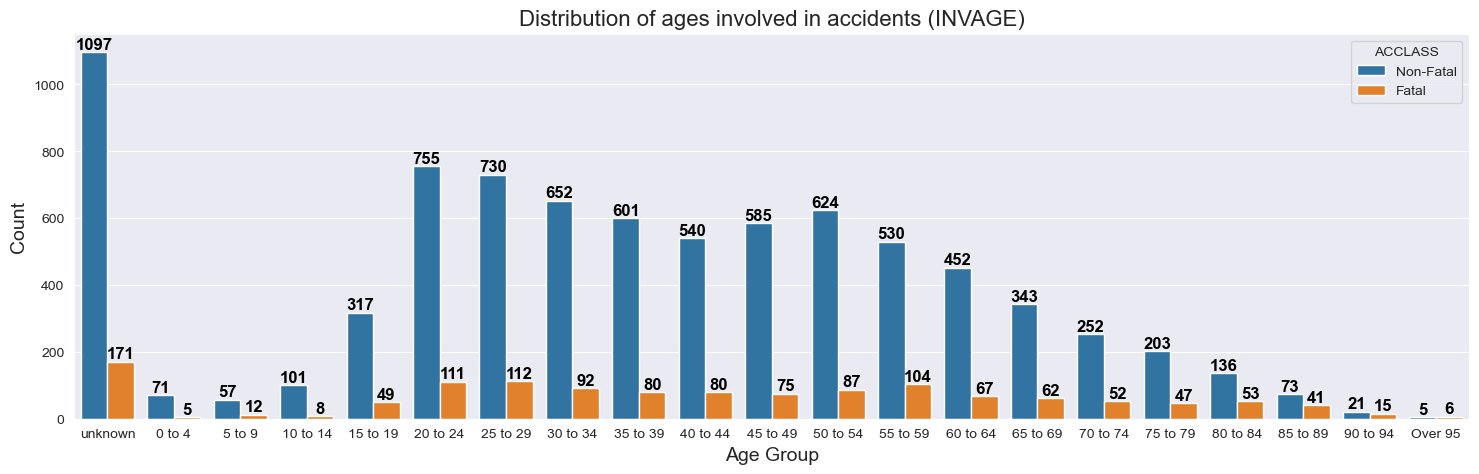

In [1929]:
def extract_numeric(age_label):
    if age_label == 'unknown':
        return -1  # Place 'unknown' first.
    elif age_label == 'Over 95':
        return 95  # Place 'Over 95' last.
    else:
        return int(age_label.split(" ")[0])
sorted_labels = sorted(df1['INVAGE'].unique(), key=extract_numeric)
plt.figure(figsize=(18, 5))
ax = sns.countplot(data=df1, x='INVAGE', order=sorted_labels, hue='ACCLASS')
for p in ax.patches:
    height = p.get_height()
    if height != 0:  # Added this to remove the random '0' in the first bar.
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.title("Distribution of ages involved in accidents (INVAGE)", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Count", fontsize=14)
# plt.show()

# ==================================================================================================================
# horizontal_bar_graph(df1, 'DISTRICT', 'Accidents by Municipal Region (DISTRICT)', 'Number of Accidents', 'DISTRICT', figsize=(14, 2))

In [1930]:
# map_accidents(df1, accident_col='ACCLASS', lon_col='LONGITUDE', lat_col='LATITUDE', grid_resolution=250, density_threshold=0.5, figsize=(18, 13))

### Features Correlation
This section will not be present in the .py file, as this is primarily for testing.

In [1931]:
# Macro for heatmap
# def corr_heatmap(df, title, numeric=False, figsize=(10, 8)):
#     """
#     df (pd.DataFrame): The DataFrame containing the data.
#     title (str): The title of the heatmap.
#     numeric (bool): Whether to filter for numeric or not.
#     figsize (tuple): The size of the figure (width, height). Default is (20, 16).
#     """
#     if numeric:
#         df = df.select_dtypes(include=['number'])
#
#     corr = df.corr()
#     plt.figure(figsize=figsize)
#     sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
#     plt.title(title, fontsize=16)
#     plt.show()

In [1932]:
# corr_heatmap(df0, 'Features Correlation (original dataset)', True)
# corr_heatmap(df1, 'Features Correlation (modified dataset)', True)

In [1933]:
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# for col in df1.columns:
#     df1[col] = label_encoder.fit_transform(df1[col]) # Encode categorical columns.

# corr_heatmap(df1, 'Features Correlation', figsize= (20, 16))

In [1934]:
# from scipy.stats import chi2_contingency
#
# target = 'ACCLASS'
# features = df1.columns.drop(target)
# results = []
# for feature in features:
#     contingency_table = pd.crosstab(df1[feature], df1[target])
#     chi2, p, dof, expected = chi2_contingency(contingency_table)
#     results.append({
#         'Feature': feature,
#         'Chi-Square Statistic': chi2,
#         'P-Value': p,
#         'Degrees of Freedom': dof
#     })
#
# results_df = pd.DataFrame(results)
# # print(results_df)
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Chi-Square Statistic', y='Feature', data=results_df, palette='viridis')
# plt.title('Chi-Square Statistics for Categorical Features vs ACCLASS', fontsize=16)
# plt.xlabel('Chi-Square Statistic', fontsize=12)
# plt.ylabel('Feature', fontsize=12)
# plt.show()
#
# plt.figure(figsize=(10, 6))
# sns.barplot(x='P-Value', y='Feature', data=results_df, palette='viridis')
# plt.title('P-Values for Categorical Features vs ACCLASS', fontsize=16)
# plt.xlabel('P-Value', fontsize=12)
# plt.ylabel('Feature', fontsize=12)
# plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')
# plt.legend()
# plt.show()

### Insights:
- Dataset presents a heavy bias on 'non-fatal' accidents. That's good in the safety sense, but not as good for statistical analysis as there is fewer data points on fatal accidents.
- Total accidents on a yearly basis are declining, that's good news, and fatalities tend to be on a very slow decline but is less predictable.
- Most accidents happen during the summer when people are on school break (JUN-AUG) and possibly temporarily high population from tourism.
- Fridays are the most prevalent in total and non-fatal accidents; it's the weekend and people tend to go crazy.
- Station wagons and 'other' vehicles account for more than half all the accidents.
- Dry weather allows for faster (aggressive) driving, thus leads in accidents by road surface condition. While wet conditions inhibits braking power and sometimes vehicles can experience hydroplaning.
- Ages 20-54 are the most involved in these accidents, while the age group 20-24 have the highest among all accounts. This is when many new drivers in Ontario receive their full G license, and are just starting to drive on their own with less supervision and driving restrictions. Number of accidents decrease as age increases, this is likely due to the elderly staying at home more and also driving less.
- Most accidents happen during daylight, just a bit more than in dark lighting conditions, probably due to pedestrian higher activity during the day and many people would already be home after their 9am-5pm jobs.
- In terms of density, downtown Toronto seems to have the highest concentration of accidents. This is anticipated as it is the densest by residential and general pedestrian population out of all the other regions. Also, the downtown area has never been very compatible with cars (old roads dedicated to trams, pedestrian walking and cycling). It has become plagued with heavy congestion from personal vehicles and endless construction. Because of these, more pedestrians, cyclists and drivers are active at any time and much closer to each other, which could increase the chances of accidents.
- While these plots don't necessarily help with selecting features to build the classifier model, they can provide context for the human when interpreting testing results.

# PART 2 - Model Building
by: Rafael Carlo Posadas

In [1935]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

In [1936]:
# Duplicate df1
df2 = df1.copy()

# Replace the remaining null values with the mode of each column.
for col in df2.columns:
    df2[col] = df2[col].fillna(df2[col].mode()[0])

# Verify that no more columns have nulls; no columns should be displayed.
print(df2.isnull().sum()[df2.isnull().sum() > 0])

Series([], dtype: int64)


## Feature selection

#### Chi-square score

In [1939]:
# Separate categorical columns into another df.
df2_categorical = df2.select_dtypes(include=['object'])

# I'm not sure whether to drop these columns. HOOD_140 has a giant score.
df2_categorical = df2_categorical.drop(columns=[
    # 'HOOD_140'
])

<Axes: title={'center': 'Chi Value Scores'}, xlabel='Score', ylabel='Features'>

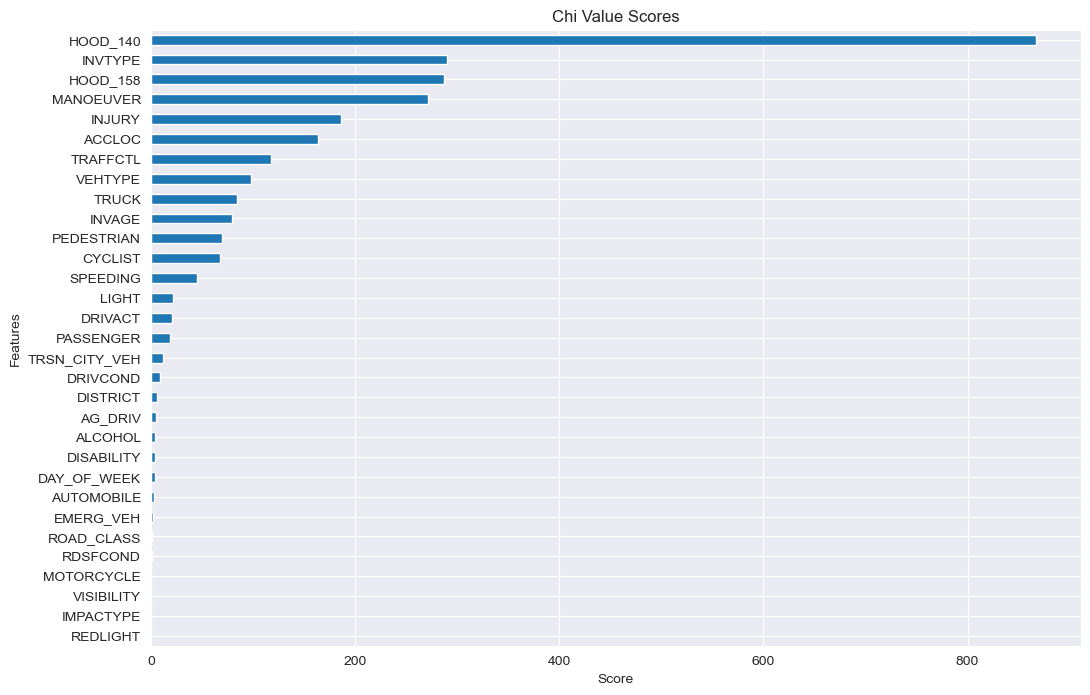

In [1941]:
for col in df2_categorical.columns:
    le = LabelEncoder()
    df2_categorical[col] = le.fit_transform(df2_categorical[col])

X = df2_categorical.drop('ACCLASS', axis=1)
y = df2_categorical['ACCLASS']

chi_scores = chi2(X, y)

chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=True, inplace=True)
chi_values.plot(kind='barh', figsize=(12, 8),
                xlabel='Score',
                ylabel='Features',
                title='Chi Value Scores',)